In [1]:
#Needed libraries
import pandas as pd
import warnings
warnings.simplefilter('ignore')

#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.metrics import auc, roc_curve, classification_report
%matplotlib inline

# Read the data set into data frame
df = pd.read_csv('conversion_data.csv')
print(df.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


 Goal:
 Predict conversion rate
 Giving recommendations for the product team and marketing team to improve conversion rate
 
 Data schema:
 "conversion_data": It has information about signed-in users during one session. Each row is a user session.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [2]:
# Displays descriptive stats for all columns
print(df.describe())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


In [3]:
#check how many categories/ most frequent categories
for col in df.columns:
    uniques = sorted(df[col].unique())
    print('{0:20s} {1:5d}\t'.format(col, len(uniques)), uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


In [4]:
# Remove Outliners
# Age has a max of 123 years which doesn't make sense

df[df['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [5]:
df =  df[df['age'] < 100]
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# EDA

Text(0.5, 1.0, 'Converted Count by country')

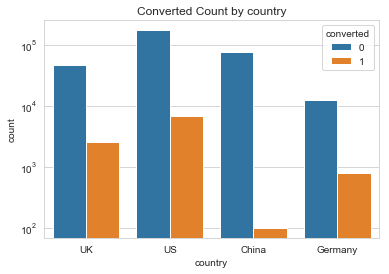

In [14]:
import seaborn as sns

# Overview of the converted count compared by county
ax1 = sns.countplot(x = "country", hue = 'converted', data = df)
sns.set_style("whitegrid")
ax1.set_yscale('log')
ax1.set_title('Converted Count by country')

Text(0.5, 1.0, 'Converted rate by country')

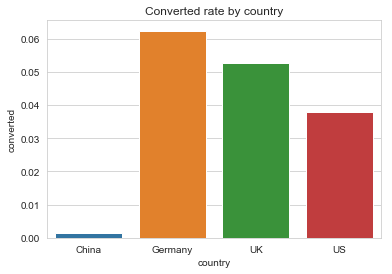

In [15]:
converted_by_country = df[['country', 'converted']].groupby('country').mean().reset_index()

ax2 = sns.barplot(x="country", y='converted', data = converted_by_country)
sns.set_style("whitegrid")
ax2.set_title('Converted rate by country')

Text(0.5, 1.0, 'New user Vs. converted')

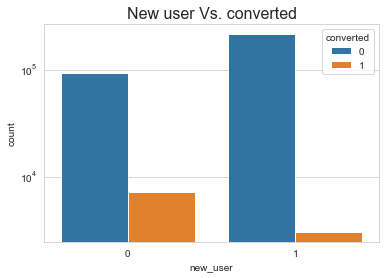

In [30]:
# Overview of the converted count compared by county
ax3 = sns.countplot(x = 'new_user', hue = 'converted', data = df)
sns.set_style("whitegrid")
ax3.set_yscale('log')
ax3.set_title('New user Vs. converted', fontsize = 16)


[Text(0, 0, 'old user'), Text(0, 0, 'new user')]

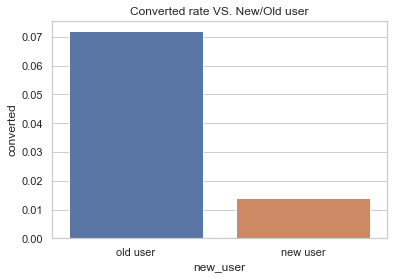

In [54]:
converted_by_newuser = df[['new_user', 'converted']].groupby('new_user').mean().reset_index()

ax4 = sns.barplot(x="new_user", y='converted', data = converted_by_newuser)
sns.set_style("whitegrid")
ax4.set_title('Converted rate VS. New/Old user')
ax4.set_xticklabels(['old user','new user'])
# older user group seems has a way lower converted rate

[Text(0, 0, '10'),
 Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '60'),
 Text(0, 0, '70'),
 Text(0, 0, '80')]

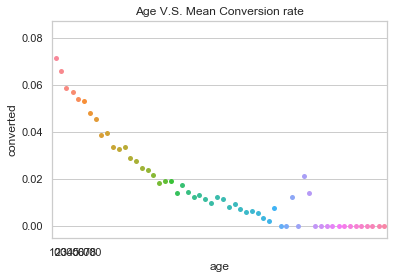

In [67]:
# Age VS. Average conversion rate?????????????

converted_by_age = df[['age', 'converted']].groupby('age').mean().reset_index()
sns.set_style('whitegrid')
ax5 = sns.stripplot(x = "age", y = "converted", data = converted_by_age)
ax5.set_title('Age V.S. Mean Conversion rate')
ax5.set_xticklabels([10,20,30,40,50,60,70,80])

Text(0.5, 1.0, 'Total pages visited V.S. Mean Conversion rate')

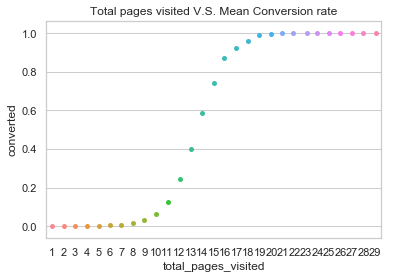

In [52]:
# Let's see the total_pages_visited with converted rate

converted_by_totalpage = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
sns.set_style('whitegrid')
ax6 = sns.stripplot(x = "total_pages_visited", y = "converted", data = converted_by_totalpage)
ax6.set_title('Total pages visited V.S. Mean Conversion rate')

# Building a Random Forest Model

In [69]:
# Change data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
    
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,0,1,0
1,3,23,1,2,5,0
2,3,28,1,2,4,0
3,0,39,1,2,5,0
4,3,30,1,2,6,0


In [76]:
#Random Forest

from sklearn import ensemble
model = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 25)
model.fit(df[df.columns[df.columns != 'converted']], df.converted)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0.5, 1.0, 'Importances of Features Plot')

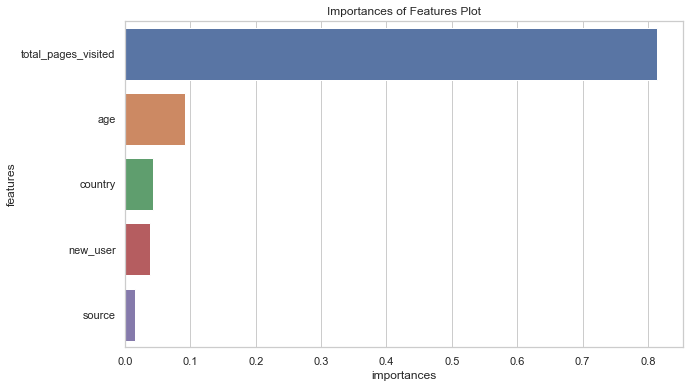

In [80]:
#plot feature importance 

df_plot = pd.DataFrame({'features': df.columns[df.columns != 'converted'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending = False)

plt.figure(figsize=[10,6])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')

In [85]:
# Import train_test_split function
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#from sklearn.cross_validate import train_test_split

y_true = df.pop('converted')

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(df, y_true, test_size = 0.30) # 70% training and 30% test

In [114]:
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve

#Train the model using the training sets
model.fit(x_train, y_train)
targetname = ['Class 0', 'Class 1']

train_true = pd.DataFrame(y_train)
test_true =  pd.DataFrame(y_test)

train_pred = pd.DataFrame(model.predict(x_train))
test_pred = pd.DataFrame(model.predict(x_test))


print('classfication report for trainning')
print(classification_report(y_true = train_true, y_pred = train_pred, target_names = targetname))

print('classfication report for test')
print(classification_report(y_true = test_true, y_pred = test_pred, target_names = targetname))

classfication report for trainning
              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99    214234
     Class 1       0.89      0.73      0.80      7104

   micro avg       0.99      0.99      0.99    221338
   macro avg       0.94      0.86      0.90    221338
weighted avg       0.99      0.99      0.99    221338

classfication report for test
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     91766
     Class 1       0.81      0.68      0.74      3094

   micro avg       0.98      0.98      0.98     94860
   macro avg       0.90      0.84      0.87     94860
weighted avg       0.98      0.98      0.98     94860



[0. 0. 0. ... 0. 0. 0.]


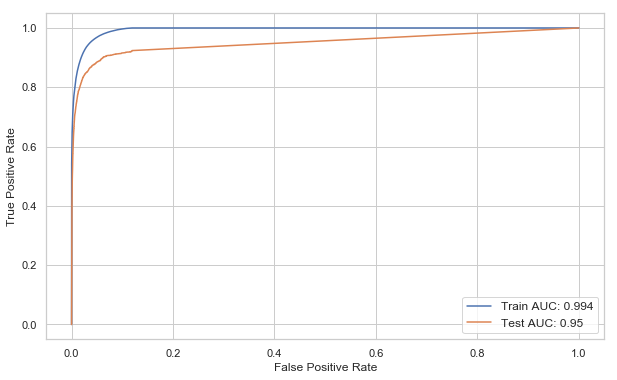

In [137]:
# GET ROC curve
from sklearn.metrics import roc_curve, auc

train_pred_prob = model.predict_proba(x_train)[:, 1]
test_pred_prob = model.predict_proba(x_test)[:, 1]

train_fpr, train_tpr, _ = roc_curve(train_true.converted, train_pred_prob)
test_fpr, test_tpr, _ = roc_curve(test_true.converted, test_pred_prob)


train_auc = round(auc(train_fpr, train_tpr),3)
test_auc = round(auc(test_fpr, test_tpr),3)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_fpr, train_tpr, label = 'Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label = 'Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)